In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Acquire Data
path="/content/drive/MyDrive/Data Science Project/Metro_Interstate_Traffic_Volume.csv"
df=pd.read_csv(path)
#df.head(50)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
#ETL
#df.isnull().sum()
#no null values in dataset

#convert date_time column to date_time format
df['date_time'] = pd.to_datetime(df['date_time'])

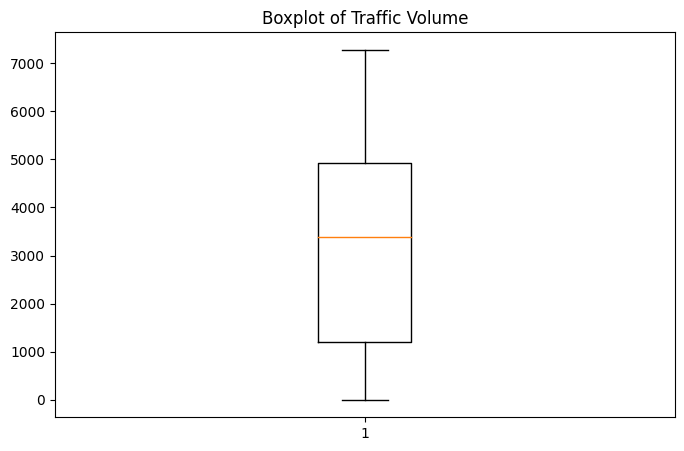

In [6]:
#Data Wrangling
#Check Outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.show()
#no outlier in traffic volume col

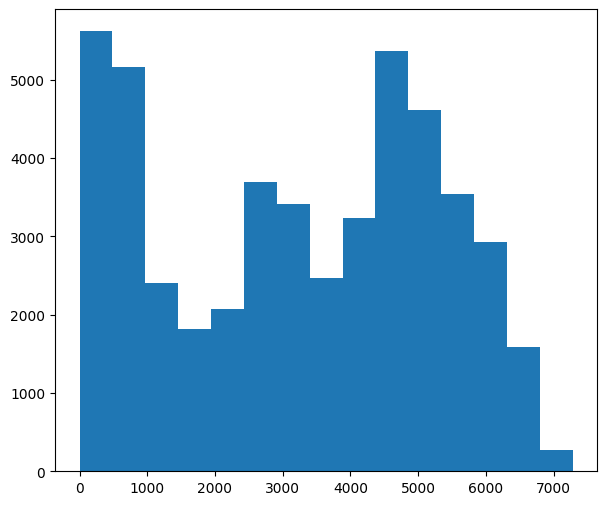

In [7]:
#Data Visualization

#Traffic Volume Histogram
plt.figure(figsize=(7,6))
plt.hist(df['traffic_volume'],bins=15)
plt.show()

In [8]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

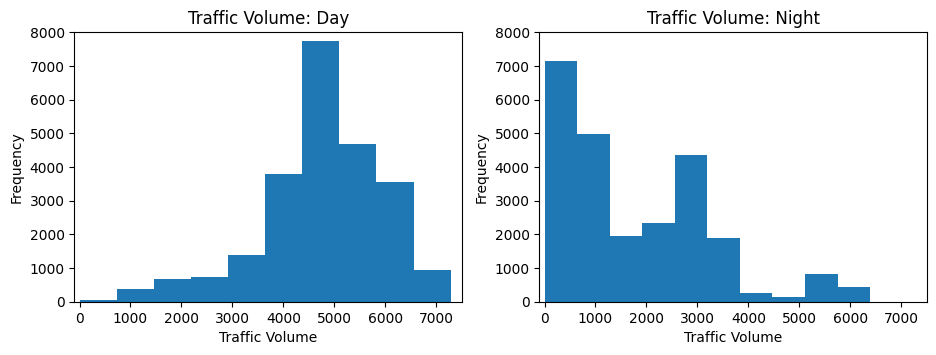

In [9]:
#traffic Voume Day N Night
day = df[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour <19)]
night=df[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour <7)]

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [10]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

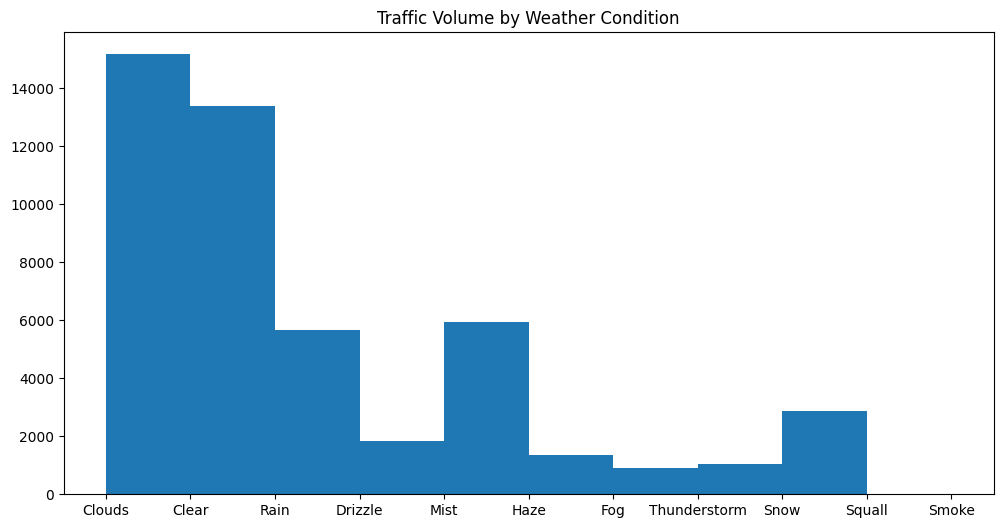

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df['weather_main'])
plt.title('Traffic Volume by Weather Condition')
plt.show()


<ipython-input-13-b8b81fc8129b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour
<ipython-input-13-b8b81fc8129b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour = day.groupby('hour').mean()


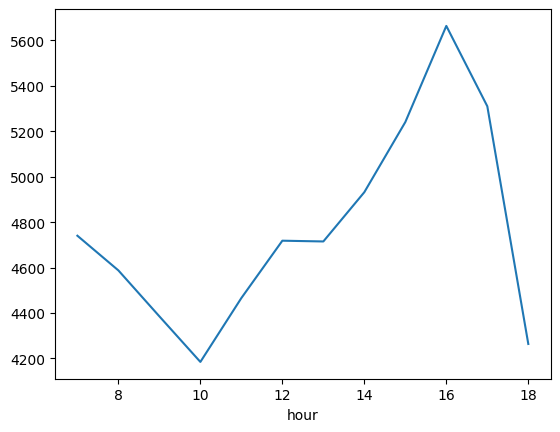

In [13]:
day['hour'] = day['date_time'].dt.hour
by_hour = day.groupby('hour').mean()
by_hour['traffic_volume'].plot.line()
plt.show()

<ipython-input-14-7fadf12fe652>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['dayofweek'] = day['date_time'].dt.dayofweek
<ipython-input-14-7fadf12fe652>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek = day.groupby('dayofweek').mean()


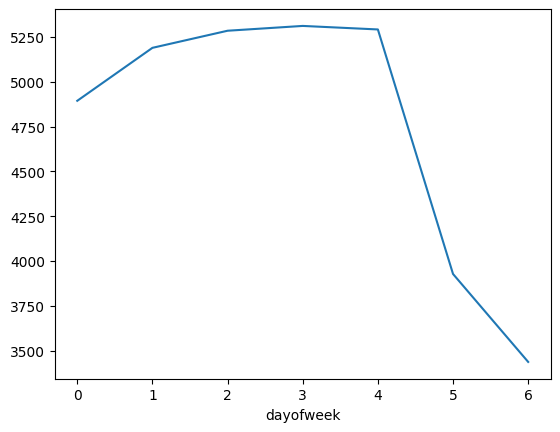

In [14]:
#week wise traffic
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

<ipython-input-15-229334382352>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month
<ipython-input-15-229334382352>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day.groupby('month').mean()


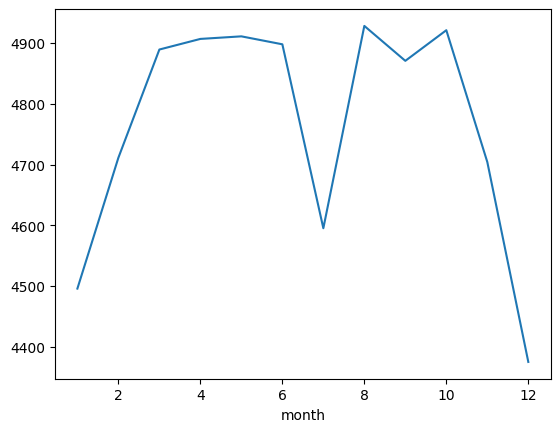

In [15]:
#month wise
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

<ipython-input-16-df550f51f574>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['year'] = day['date_time'].dt.year
<ipython-input-16-df550f51f574>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month
<ipython-input-16-df550f51f574>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the functio

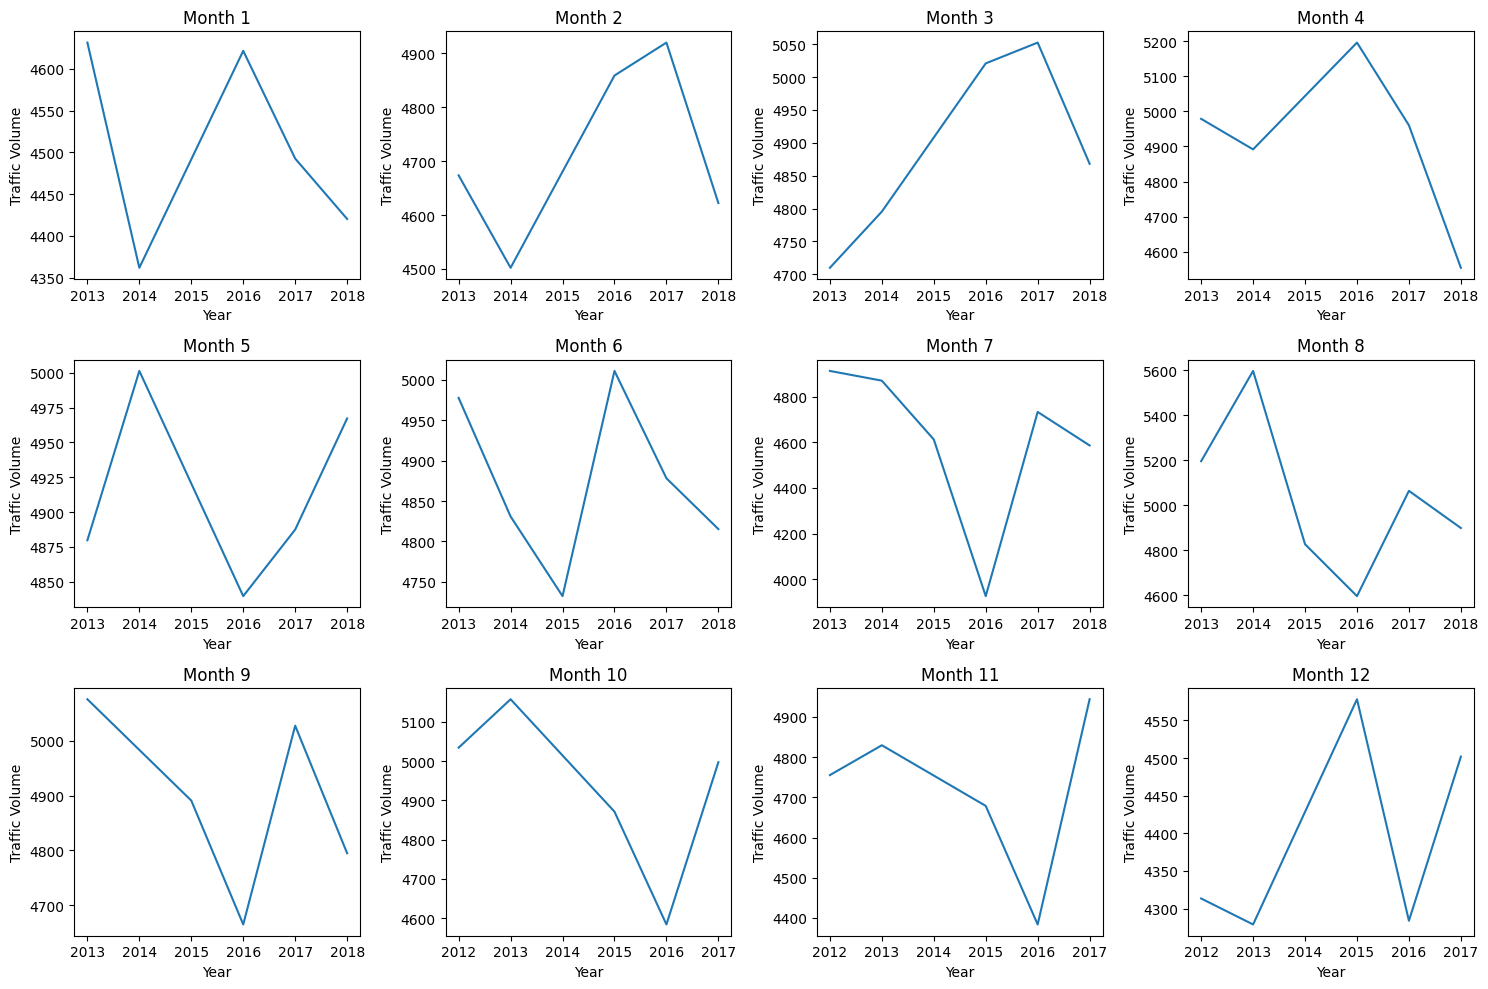

In [16]:

# Extract year and month from the date_time column
day['year'] = day['date_time'].dt.year
day['month'] = day['date_time'].dt.month

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Iterate over each month
for i, month in enumerate(range(1, 13)):
    # Filter data for the current month
    monthly_data = day[day['month'] == month]

    # Group by year and calculate mean traffic volume
    monthly_avg = monthly_data.groupby('year').mean()['traffic_volume']

    # Plot on the current subplot
    monthly_avg.plot.line(ax=axes[i])

    # Set subplot title and labels
    axes[i].set_title(f'Month {month}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Traffic Volume')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<ipython-input-17-c8d14418dd85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour
<ipython-input-17-c8d14418dd85>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = bussiness_days.groupby('hour').mean()
<ipython-input-17-c8d14418dd85>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.group

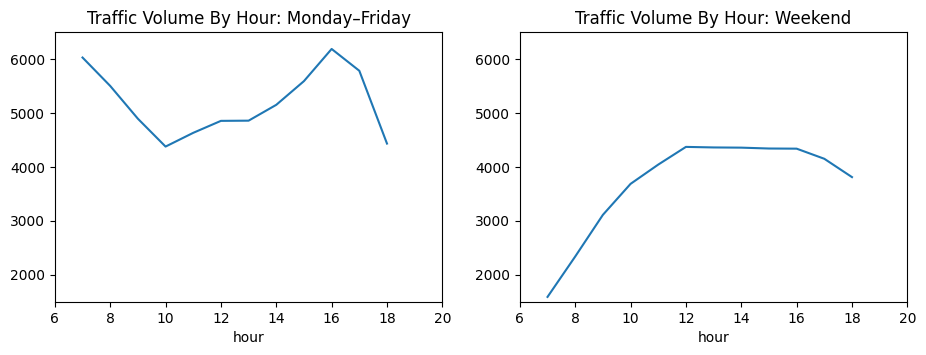

In [17]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 = Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
plt.figure(figsize=(11,3.5))
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')
plt.show()

In [18]:
#Analyzing traffic with weather
day.corr()['traffic_volume']

<ipython-input-18-a08bdd5ec7b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
dayofweek        -0.416453
month            -0.022337
year             -0.003557
Name: traffic_volume, dtype: float64

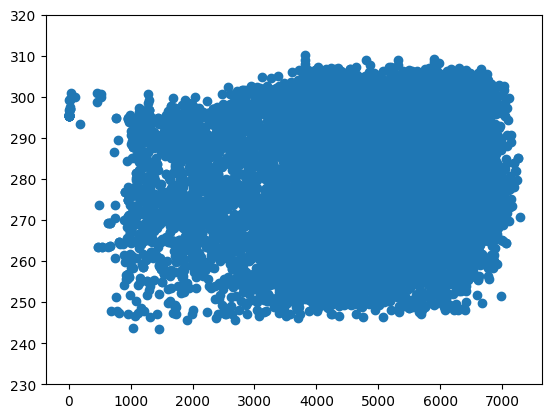

In [19]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.ylim(230, 320)
plt.show()

<ipython-input-20-0ac45c30cbb2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = day.groupby('weather_main').mean()


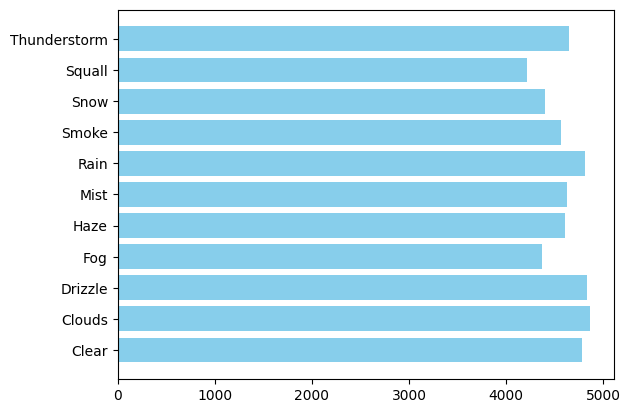

In [20]:
by_weather_main = day.groupby('weather_main').mean()
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'], color='skyblue')
plt.show()

<ipython-input-21-59fffede8d58>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = day.groupby('weather_description').mean()


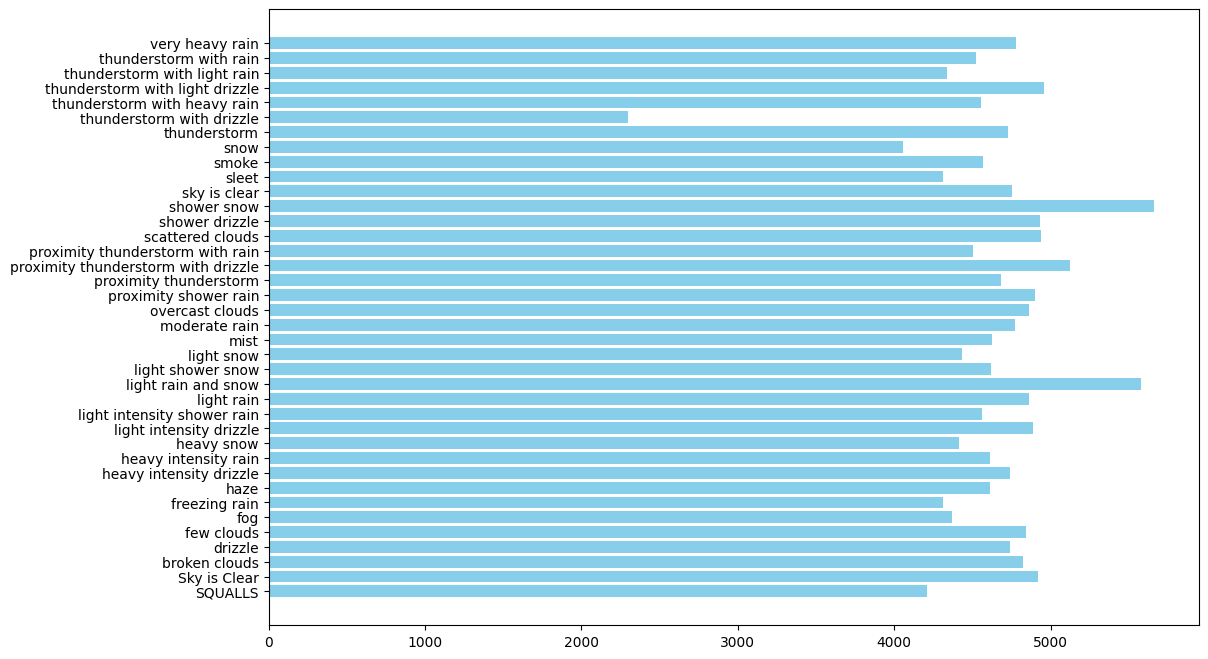

In [21]:
by_weather_description = day.groupby('weather_description').mean()
plt.figure(figsize=(12, 8))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'], color='skyblue')
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Feature Engineering
day['hour'] = day['date_time'].dt.hour
day['day_of_week'] = day['date_time'].dt.dayofweek

# Select Features and Target
features = ['hour', 'day_of_week', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']
target = 'traffic_volume'

X = day[features]
y = day[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

test_input = pd.DataFrame({
    'hour': [12],
    'day_of_week': [2],  # Assuming Tuesday
    'temp': [290],       # Temperature in Kelvin
    'rain_1h': [0.0],     # Rain in the last hour
    'snow_1h': [0.0],     # Snow in the last hour
    'clouds_all': [50]    # Cloud cover percentage
})

# Making predictions using the trained model
predicted_traffic_volume = model.predict(test_input)

# Displaying the predicted traffic volume
print(f'Predicted Traffic Volume: {predicted_traffic_volume[0]}')


# Evaluation Metrics
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')


<ipython-input-23-2db446477536>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour
<ipython-input-23-2db446477536>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['day_of_week'] = day['date_time'].dt.dayofweek


Predicted Traffic Volume: 4842.7
Mean Absolute Error: 339.5290273324468
Mean Squared Error: 320237.6411370917
R-squared: 0.7692204350284279
